<a href="https://colab.research.google.com/github/anadognini/atividades_EBAC/blob/main/M09%20-%20Agrega%C3%A7%C3%B5es%20e%20opera%C3%A7%C3%B5es%20em%20grupos/m09_tarefa_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
sinasc = pd.read_csv('SINASC_RO_2019.csv')
sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
int64_cols = sinasc.select_dtypes(include=['int64']).columns
float64_cols = sinasc.select_dtypes(include=['float64']).columns

int64_cols, float64_cols

(Index(['ORIGEM', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'CODMUNRES', 'CONSULTAS',
        'PESO', 'NUMEROLOTE', 'DIFDATA', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES',
        'TPROBSON', 'PARIDADE', 'KOTELCHUCK', 'CONTADOR'],
       dtype='object'),
 Index(['CODESTAB', 'ESTCIVMAE', 'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT',
        'HORANASC', 'APGAR1', 'APGAR5', 'IDANOMAL', 'DTRECORIGA', 'NATURALMAE',
        'CODMUNNATU', 'CODUFNATU', 'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE',
        'RACACORMAE', 'QTDGESTANT', 'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI',
        'DTULTMENST', 'SEMAGESTAC', 'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT',
        'TPAPRESENT', 'STTRABPART', 'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP',
        'TPDOCRESP', 'DTDECLARAC', 'ESCMAEAGR1', 'munResLat', 'munResLon',
        'munResAlt', 'munResArea'],
       dtype='object'))

# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [4]:
sinasc['munResLat']

,munResLat
0,-11.93554
1,-11.93554
2,-11.93554
3,-12.13178
4,-11.93554
...,...
27023,-12.74137
27024,-12.55684
27025,-12.74137
27026,-12.74137


In [5]:
sinasc['Latitude'] = pd.cut(sinasc['munResLat'], [-90, -10.5, 0])
sinasc['Latitude']

,Latitude
0,"(-90.0, -10.5]"
1,"(-90.0, -10.5]"
2,"(-90.0, -10.5]"
3,"(-90.0, -10.5]"
4,"(-90.0, -10.5]"
...,...
27023,"(-90.0, -10.5]"
27024,"(-90.0, -10.5]"
27025,"(-90.0, -10.5]"
27026,"(-90.0, -10.5]"


In [6]:
# Variáveis escolhidas foram IDADEMAE e PESO.

resultado_latitude = sinasc.groupby('Latitude').agg({
    'IDADEMAE': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')],
    'PESO': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')]
})

resultado_latitude

/tmp/ipython-input-3439637294.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado_latitude = sinasc.groupby('Latitude').agg({


IDADEMAE                                                 \
                   soma      média mínimo máximo mediana desvio padrão   
Latitude                                                                 
(-90.0, -10.5]   340143  26.178943     12     53    26.0      6.320385   
(-10.5, 0.0]     365094  26.014964     11     52    25.0      6.447663   

                               PESO                                     \
                variância      soma        média mínimo máximo mediana   
Latitude                                                                 
(-90.0, -10.5]  39.947272  42098594  3240.098053    258   5985  3270.0   
(-10.5, 0.0]    41.572355  45555148  3246.055864    295   5190  3275.0   

                                             
               desvio padrão      variância  
Latitude                                     
(-90.0, -10.5]    531.815114  282827.315354  
(-10.5, 0.0]      556.487709  309678.570242

### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas


In [7]:
area_minima = sinasc['munResArea'].min()
area_maxima = sinasc['munResArea'].max()

sinasc['Area'] = pd.cut(sinasc['munResArea'], [area_minima, 3000, area_maxima])
sinasc['Area']

,Area
0,"(3000.0, 34096.394]"
1,"(3000.0, 34096.394]"
2,"(3000.0, 34096.394]"
3,"(3000.0, 34096.394]"
4,"(3000.0, 34096.394]"
...,...
27023,"(3000.0, 34096.394]"
27024,"(3000.0, 34096.394]"
27025,"(3000.0, 34096.394]"
27026,"(3000.0, 34096.394]"


In [8]:
resultado_area = sinasc.groupby('Area').agg({
    'IDADEPAI': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')],
    'APGAR1': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')]
})

resultado_area

/tmp/ipython-input-345959176.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado_area = sinasc.groupby('Area').agg({


IDADEPAI                                                 \
                         soma      média mínimo máximo mediana desvio padrão   
Area                                                                           
(459.978, 3000.0]     76688.0  31.085529   16.0   69.0    30.0      7.664946   
(3000.0, 34096.394]  158424.0  31.094014   15.0   86.0    30.0      7.818364   

                                  APGAR1                                  \
                     variância      soma     média mínimo máximo mediana   
Area                                                                       
(459.978, 3000.0]    58.751400   41558.0  8.074218    0.0   10.0     8.0   
(3000.0, 34096.394]  61.126809  177079.0  8.152808    0.0   10.0     8.0   

                                             
                    desvio padrão variância  
Area                                         
(459.978, 3000.0]        1.009443  1.018976  
(3000.0, 34096.394]      0.978517  0.957495

### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [9]:
altitude_min = sinasc['munResAlt'].min()
altitude_max = sinasc['munResAlt'].max()
altitude_media = sinasc['munResAlt'].mean()

sinasc['Altitude'] = pd.cut(sinasc['munResAlt'], [altitude_min, altitude_media, altitude_max])
sinasc['Altitude']

,Altitude
0,"(179.112, 595.0]"
1,"(179.112, 595.0]"
2,"(179.112, 595.0]"
3,"(179.112, 595.0]"
4,"(179.112, 595.0]"
...,...
27023,"(179.112, 595.0]"
27024,"(179.112, 595.0]"
27025,"(179.112, 595.0]"
27026,"(179.112, 595.0]"


In [10]:
resultado_altitude = sinasc.groupby('Altitude').agg({
    'QTDFILVIVO': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')],
    'APGAR5': [('soma', 'sum'), ('média', 'mean'), ('mínimo', 'min'), ('máximo', 'max'), ('mediana', 'median'), ('desvio padrão', 'std'), ('variância', 'var')]
})

resultado_altitude

/tmp/ipython-input-3016019231.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  resultado_altitude = sinasc.groupby('Altitude').agg({


QTDFILVIVO                                                \
                       soma     média mínimo máximo mediana desvio padrão   
Altitude                                                                    
(85.0, 179.112]     19090.0  1.098389    0.0   14.0     1.0      1.203734   
(179.112, 595.0]     7303.0  0.939655    0.0   30.0     1.0      1.066487   

                              APGAR5                                  \
                 variância      soma     média mínimo máximo mediana   
Altitude                                                               
(85.0, 179.112]   1.448976  172306.0  9.195538    0.0   10.0     9.0   
(179.112, 595.0]  1.137395   71757.0  9.136364    0.0   10.0     9.0   

                                          
                 desvio padrão variância  
Altitude                                  
(85.0, 179.112]       0.782458  0.612240  
(179.112, 595.0]      0.815062  0.664326

### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia


In [11]:
imediatas = {
    "Candeias do Jamari": "Porto Velho",
    "Guajará-Mirim": "Porto Velho",
    "Itapuã do Oeste": "Porto Velho",
    "Nova Mamoré": "Porto Velho",
    "Porto Velho": "Porto Velho",
    "Ariquemes": "Ariquemes",
    "Alto Paraíso": "Ariquemes",
    "Buritis": "Ariquemes",
    "Cacaulândia": "Ariquemes",
    "Campo Novo de Rondônia": "Ariquemes",
    "Cujubim": "Ariquemes",
    "Monte Negro": "Ariquemes",
    "Rio Crespo": "Ariquemes",
    "Jaru": "Jaru",
    "Governador Jorge Teixeira": "Jaru",
    "Machadinho D'Oeste": "Jaru",
    "Theobroma": "Jaru",
    "Vale do Anari": "Jaru",
    "Alvorada D'Oeste": "Ji-Paraná",
    "Costa Marques": "Ji-Paraná",
    "Ji-Paraná": "Ji-Paraná",
    "Mirante da Serra": "Ji-Paraná",
    "Nova União": "Ji-Paraná",
    "Ouro Preto do Oeste": "Ji-Paraná",
    "Presidente Médici": "Ji-Paraná",
    "São Francisco do Guaporé": "Ji-Paraná",
    "São Miguel do Guaporé": "Ji-Paraná",
    "Seringueiras": "Ji-Paraná",
    "Teixeirópolis": "Ji-Paraná",
    "Urupá": "Ji-Paraná",
    "Vale do Paraíso": "Ji-Paraná",
    "Cacoal": "Cacoal",
    "Alta Floresta D'Oeste": "Cacoal",
    "Alto Alegre dos Parecis": "Cacoal",
    "Castanheiras": "Cacoal",
    "Espigão D'Oeste": "Cacoal",
    "Ministro Andreazza": "Cacoal",
    "Nova Brasilândia D'Oeste": "Cacoal",
    "Novo Horizonte do Oeste": "Cacoal",
    "Parecis": "Cacoal",
    "Pimenta Bueno": "Cacoal",
    "Primavera de Rondônia": "Cacoal",
    "Rolim de Moura": "Cacoal",
    "Santa Luzia D'Oeste": "Cacoal",
    "São Felipe D'Oeste": "Cacoal",
    "Vilhena": "Vilhena",
    "Cabixi": "Vilhena",
    "Cerejeiras": "Vilhena",
    "Chupinguaia": "Vilhena",
    "Colorado do Oeste": "Vilhena",
    "Corumbiara": "Vilhena",
    "Pimenteiras do Oeste": "Vilhena"
}

In [12]:
sinasc['Região Imediata'] = sinasc['munResNome'].map(imediatas)
sinasc['Região Imediata']

,Região Imediata
0,Cacoal
1,Cacoal
2,Cacoal
3,Cacoal
4,Cacoal
...,...
27023,Vilhena
27024,Vilhena
27025,Vilhena
27026,Vilhena


In [13]:
sinasc['DTNASC'] = pd.to_datetime(sinasc['DTNASC'])
sinasc['Ano e Mês'] = sinasc['DTNASC'].dt.to_period('M')

idade_media_mae = sinasc.groupby(['Ano e Mês', 'Região Imediata'])['IDADEMAE'].mean().reset_index()


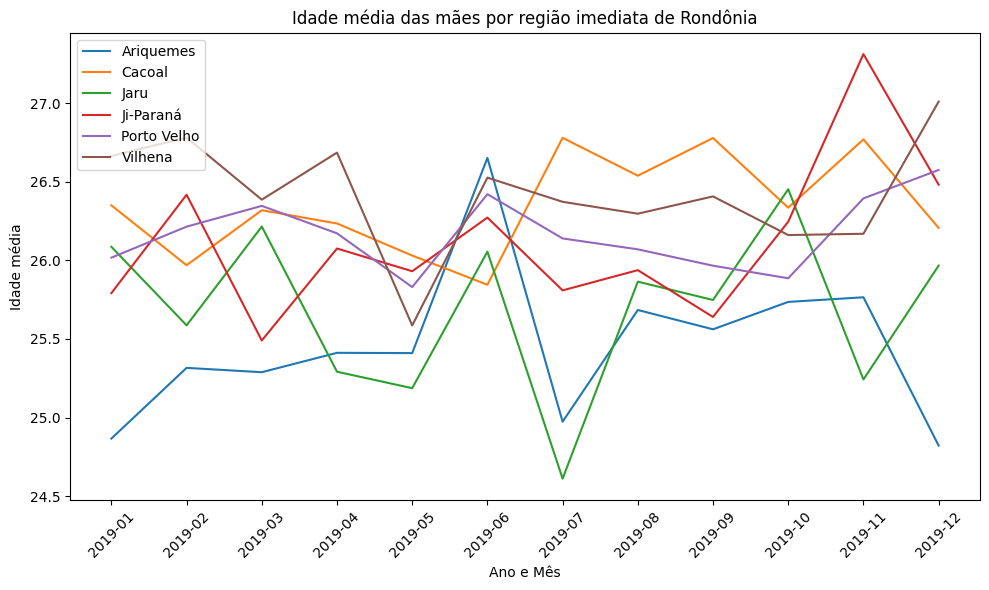

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

for regiao in idade_media_mae['Região Imediata'].unique():
    dados = idade_media_mae[idade_media_mae['Região Imediata'] == regiao]
    plt.plot(dados['Ano e Mês'].astype(str), dados['IDADEMAE'], label=regiao)

plt.title('Idade média das mães por região imediata de Rondônia')
plt.xlabel('Ano e Mês')
plt.ylabel('Idade média')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


In [15]:
idh_ro = {
    "Porto Velho": 0.736,
    "Vilhena": 0.731,
    "Cacoal": 0.718,
    "Ji-Paraná": 0.714,
    "Pimenta Bueno": 0.710,
    "Ariquemes": 0.702,
    "Rolim de Moura": 0.700,
    "Cerejeiras": 0.692,
    "Jaru": 0.689,
    "Colorado do Oeste": 0.685,
    "Ouro Preto do Oeste": 0.682,
    "Espigão D'Oeste": 0.672,
    "Santa Luzia d'Oeste": 0.670,
    "Pimenteiras do Oeste": 0.665,
    "Presidente Médici": 0.664,
    "Castanheiras": 0.658,
    "Guajará-Mirim": 0.657,
    "Chupinguaia": 0.652,
    "Cabixi": 0.650,
    "Candeias do Jamari": 0.649,
    "São Felipe d'Oeste": 0.649,
    "Cacaulândia": 0.646,
    "São Miguel do Guaporé": 0.646,
    "Mirante da Serra": 0.643,
    "Alvorada d'Oeste": 0.643,
    "Teixeirópolis": 0.643,
    "Nova Brasilândia d'Oeste": 0.643,
    "Rio Crespo": 0.643,
    "Primavera de Rondônia": 0.641,
    "Alta Floresta d'Oeste": 0.641,
    "Ministro Andreazza": 0.638,
    "Novo Horizonte do Oeste": 0.634,
    "Vale do Paraíso": 0.627,
    "Alto Paraíso": 0.625,
    "Parecis": 0.617,
    "Buritis": 0.616,
    "Itapuã do Oeste": 0.614,
    "Corumbiara": 0.613,
    "Cujubim": 0.612,
    "Costa Marques": 0.611,
    "São Francisco do Guaporé": 0.611,
    "Urupá": 0.609,
    "Monte Negro": 0.607,
    "Seringueiras": 0.598,
    "Governador Jorge Teixeira": 0.596,
    "Machadinho d'Oeste": 0.596,
    "Campo Novo de Rondônia": 0.593,
    "Alto Alegre dos Parecis": 0.592,
    "Theobroma": 0.589,
    "Nova União": 0.587,
    "Nova Mamoré": 0.587,
    "Vale do Anari": 0.584
}

In [16]:
sinasc['IDH Municipio'] = sinasc['munResNome'].map(idh_ro)
sinasc['IDH Municipio'].isna().sum()

sinasc["Faixa IDH"]= pd.cut(sinasc['IDH Municipio'], bins=[0, 0.600, 0.700, 1.0],
                    labels=['Baixo', 'Médio', 'Alto'])

sinasc.groupby('Faixa IDH').agg({
        'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
        'IDADEMAE': ['mean', 'min', 'max', 'std', 'median'],
        'IDADEPAI': ['mean', 'min', 'max', 'std', 'median']
    })

/tmp/ipython-input-3131429957.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc.groupby('Faixa IDH').agg({


PESO                                              \
                sum         mean  min   max  median         std   
Faixa IDH                                                         
Baixo       4301955  3244.309955  730  4785  3255.0  514.083790   
Médio      26881501  3243.815735  258  5985  3270.0  529.038112   
Alto       51716855  3246.914553  292  5480  3275.0  554.013292   

                           IDADEMAE                            IDADEPAI        \
                     var       mean min max       std median       mean   min   
Faixa IDH                                                                       
Baixo      264282.143101  25.269231  13  46  6.103193   25.0  30.402332  16.0   
Médio      279881.323634  25.945698  11  53  6.383545   25.0  31.179363  16.0   
Alto       306930.728242  26.261678  12  47  6.415538   26.0  31.236319  15.0   

                                  
            max       std median  
Faixa IDH                         
Baixo      58.0  7.141936   30.0  
Médio      86.0  7.865229   30.0  
Alto       70.0  7.796585   30.0

### 5.2 IFDM
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


In [17]:
ifdm_ro = {
    "Ariquemes": 0.7746,
    "Vilhena": 0.7465,
    "Pimenta Bueno": 0.7383,
    "Porto Velho": 0.7257,
    "Ji-Paraná": 0.7117,
    "Cacoal": 0.7111,
    "Santa Luzia d'Oeste": 0.6850,
    "Rolim de Moura": 0.6785,
    "Chupinguaia": 0.6766,
    "São Miguel do Guaporé": 0.6699,
    "Pimenteiras do Oeste": 0.6501,
    "Teixeirópolis": 0.6500,
    "Colorado do Oeste": 0.6473,
    "Jaru": 0.6450,
    "Rio Crespo": 0.6430,
    "Primavera de Rondônia": 0.6384,
    "Alta Floresta d'Oeste": 0.6337,
    "Ouro Preto do Oeste": 0.6261,
    "São Francisco do Guaporé": 0.6214,
    "Candeias do Jamari": 0.6199,
    "Buritis": 0.6199,
    "São Felipe d'Oeste": 0.6153,
    "Presidente Médici": 0.6140,
    "Cerejeiras": 0.6137,
    "Monte Negro": 0.6016,
    "Urupá": 0.6006,
    "Espigão d'Oeste": 0.5973,
    "Seringueiras": 0.5922,
    "Alvorada d'Oeste": 0.5919,
    "Itapuã do Oeste": 0.5903,
    "Cabixi": 0.5887,
    "Novo Horizonte do Oeste": 0.5858,
    "Nova Brasilândia d'Oeste": 0.5857,
    "Vale do Paraíso": 0.5818,
    "Corumbiara": 0.5759,
    "Alto Paraíso": 0.5735,
    "Cacaulândia": 0.5721,
    "Vale do Anari": 0.5710,
    "Ministro Andreazza": 0.5657,
    "Costa Marques": 0.5626,
    "Nova União": 0.5571,
    "Guajará-Mirim": 0.5541,
    "Mirante da Serra": 0.5519,
    "Parecis": 0.5502,
    "Castanheiras": 0.5430,
    "Theobroma": 0.5405,
    "Machadinho d'Oeste": 0.5322,
    "Campo Novo de Rondônia": 0.5272,
    "Nova Mamoré": 0.5084,
    "Cujubim": 0.5055,
    "Alto Alegre dos Parecis": 0.5046,
    "Governador Jorge Teixeira": 0.4562
}

In [32]:
sinasc['IFDM Municipio'] = sinasc['munResNome'].map(ifdm_ro)
sinasc['IFDM Municipio'].isna().sum()

sinasc["Faixa IFDM"]= pd.cut(sinasc['IFDM Municipio'], bins=[0, 0.400, 0.600, 0.800, 1.0],
                    labels=['Baixo', 'Regular', 'Moderado', 'Alto'])

sinasc["Faixa_IFDM"] = pd.cut(
    sinasc['IFDM Municipio'],
    bins=[0.5, 0.6, 0.8],
    labels=['Regular', 'Moderado']
)

sinasc.groupby('Faixa_IFDM').agg({
        'PESO': ['sum', 'mean', 'min', 'max', 'median', 'std', 'var'],
        'IDADEMAE': ['mean', 'min', 'max', 'std', 'median'],
        'IDADEPAI': ['mean', 'min', 'max', 'std', 'median']
    })

/tmp/ipython-input-296086850.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc.groupby('Faixa_IFDM').agg({


PESO                                              \
                 sum         mean  min   max  median         std   
Faixa_IFDM                                                         
Regular     16110868  3242.275709  425  5985  3270.0  533.301731   
Moderado    71180107  3243.420532  258  5720  3274.0  547.829184   

                            IDADEMAE                            IDADEPAI  \
                      var       mean min max       std median       mean   
Faixa_IFDM                                                                 
Regular     284410.736368  25.560676  11  52  6.375810   25.0  31.250729   
Moderado    300116.814304  26.223139  12  53  6.385869   26.0  31.061687   

                                         
             min   max       std median  
Faixa_IFDM                               
Regular     16.0  86.0  8.033652   30.0  
Moderado    15.0  70.0  7.714357   30.0

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


In [33]:
pib_ro = {
    "Porto Velho": 20059522,
    "Ji-Paraná": 4231113,
    "Vilhena": 4215046,
    "Ariquemes": 3209761,
    "Cacoal": 2792383,
    "Jaru": 1765089,
    "Pimenta Bueno": 1642516,
    "Rolim de Moura": 1565194,
    "Guajará-Mirim": 1054179,
    "Ouro Preto do Oeste": 985868,
    "Buritis": 966552,
    "São Miguel do Guaporé": 905335,
    "Machadinho do Oeste": 890320,
    "Espigão d'Oeste": 773381,
    "Cerejeiras": 743037,
    "Nova Mamoré": 742687,
    "Alta Floresta do Oeste": 734469,
    "Candeias do Jamari": 655606,
    "Presidente Médici": 559990,
    "Nova Brasilândia do Oeste": 548734,
    "Alto Paraíso": 510361,
    "São Francisco do Guaporé": 488043,
    "Cujubim": 487480,
    "Alto Alegre dos Parecis": 483672,
    "Chupinguaia": 468793,
    "Colorado do Oeste": 424807,
    "Corumbiara": 396728,
    "Monte Negro": 389891,
    "Campo Novo de Rondônia": 369377,
    "Alvorada do Oeste": 352628,
    "Seringueiras": 332987,
    "Costa Marques": 316671,
    "Ministro Andreazza": 297878,
    "Cacaulândia": 275338,
    "Urupá": 273501,
    "Mirante da Serra": 262640,
    "Theobroma": 257426,
    "Pimenteiras do Oeste": 246209,
    "Governador Jorge Teixeira": 239330,
    "Cabixi": 238412,
    "Novo Horizonte do Oeste": 231502,
    "Vale do Anari": 220588,
    "Santa Luzia do Oeste": 213556,
    "Itapuã do Oeste": 210031,
    "Vale do Paraíso": 185648,
    "Rio Crespo": 184430,
    "Nova União": 157321,
    "Parecis": 155434,
    "São Felipe do Oeste": 130676,
    "Teixeirópolis": 121301,
    "Primavera de Rondônia": 107030,
    "Castanheiras": 99627
}

In [61]:
sinasc['munResNome'] = sinasc['munResNome'].str.strip().str.lower()
pib_ro = {k.strip().lower(): v for k, v in pib_ro.items()}

sinasc['munResNome'] = sinasc['munResNome'].replace({
    "alta floresta d'oeste": "alta floresta do oeste",
    "são felipe d'oeste": "são felipe do oeste",
    "machadinho d'oeste": "machadinho do oeste",
    "santa luzia d'oeste": "santa luzia do oeste",
    "nova brasilândia d'oeste": "nova brasilândia do oeste",
    "alvorada d'oeste": "alvorada do oeste"
})

In [62]:
sinasc['PIB Município'] = sinasc['munResNome'].map(pib_ro)

sinasc["Faixa PIB"] = pd.cut(
    sinasc['PIB Município'],
    bins=[0, 500000, 1000000, 5000000, 21000000],
    labels=['Muito Baixo', 'Baixo', 'Médio', 'Alto']
)

sinasc.groupby('Faixa PIB').agg({
        'PESO': ['mean', 'min', 'max', 'median', 'std', 'var'],
        'IDADEMAE': ['mean', 'min', 'max', 'std', 'median'],
        'IDADEPAI': ['mean', 'min', 'max', 'std', 'median']
    })

/tmp/ipython-input-2566619242.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sinasc.groupby('Faixa PIB').agg({


PESO                                                \
                    mean  min   max  median         std            var   
Faixa PIB                                                                
Muito Baixo  3243.420736  258  4888  3265.0  522.419800  272922.447020   
Baixo        3219.431532  285  5985  3255.0  542.826008  294660.075279   
Médio        3254.449603  292  5720  3275.0  523.436559  273985.831570   
Alto         3242.820078  295  5060  3280.0  579.325149  335617.628364   

              IDADEMAE                            IDADEPAI              \
                  mean min max       std median       mean   min   max   
Faixa PIB                                                                
Muito Baixo  25.739619  12  52  6.224874   25.0  31.389144  16.0  73.0   
Baixo        25.838069  11  53  6.343670   25.0  30.820969  16.0  86.0   
Médio        26.163889  12  47  6.321992   26.0  30.896370  15.0  70.0   
Alto         26.312670  12  47  6.549074   26.0  32.352679  16.0  65.0   

                              
                  std median  
Faixa PIB                     
Muito Baixo  7.816317   30.0  
Baixo        7.737239   30.0  
Médio        7.733206   30.0  
Alto         7.865620   32.0

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.